# Exploratory Data Analysis for Tuesday, October 24
  

The goal for this notebook is: 

1. Basic Statistical Relationships

Follow along as we work our way through this document. Use the code cells to test and experiment as we go. Try to complete all of the practice exercises and ask questions if you need assistance.

This notebook will introduce some basic tools for establishing relationships (statistical and causal) between variables. 

In the descriptive statistics notebook we saw how simple numerical and graphical summaries can help us better understand the behavior of a single variable. If you want to know how many points the Badgers are likely to score on Saturday a good starting point would be to compile some historical data and calculate the mean of past totals, the maximum score observed, minimum score observed, and some measure of variability. Plotting a simple histogram would go a long way toward honing in on a reasonable expectation. 

Here we will consider the relationships between variables. How might the weather impact our expectations for the Badgers' point total? Have previous games against this opponent seen above or below average scoring? Questions like these simply probe the degree to which two variables are correlated, however we will also be interested in examining causal relationships whereby values of one variable can be causally linked to values of another. This is the heart of predictive modeling. If a causal relationship can be identified it is possible to determine how changes in the value of one variable (either naturally orrurring or externally imposed) might impact another. 

We will begin by importing all the packages we will use in this notebook.

In [4]:
import seaborn as sns
import numpy as np
from numpy import cov
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline


Next we will proceed to generate two of the most basic measures of association between variables: cross tabulations and correlation matricies. Cross tabulation tables are a numerical summary of the relationship between two variables. 

Correlation is any statistical association between variables. A good way to relate whether such a relationship exists between two variables is to calculate a correlation coefficient. Typically this is measured by taking the covariance of two variables and dividing that value by the product of the two variables' standard deviations. For example, let's revisit the auto dataset from the UCI Machine Learning Database we worked with previously.

In [5]:
import pandas as pd
import numpy as np

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )

df.to_csv(r'Auto_File.csv', index = False)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
df.dtypes


symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

Obviously a bigger engine means more weight on a vehicle, but is the same true for horsepower? We can calculate the correlation coefficient between horespower and vehicle weight using the code below:

In [7]:
df1 = df.dropna()

In [8]:
covariance = cov(df1['horsepower'], df1['curb_weight'])
print(covariance)

[[   943.63131916  11697.01011066]
 [ 11697.01011066 232267.43643022]]


In [9]:
covariance = cov(df1['horsepower'], df1['curb_weight']) #calculate cov, the numerator in the coefficient
print(covariance)
corr = pearsonr(df1['horsepower'], df1['curb_weight']) #use conda to calculate the correlation coefficient
print(corr)
pcc = covariance / (df1['horsepower'].std() * df1['curb_weight'].std()) #confirm that the above calculation is correct using formula
print(pcc)

[[   943.63131916  11697.01011066]
 [ 11697.01011066 232267.43643022]]
(0.790095391541586, 3.4158182315282073e-35)
[[ 0.06373926  0.79009539]
 [ 0.79009539 15.68891789]]


In [10]:
df1.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine_size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


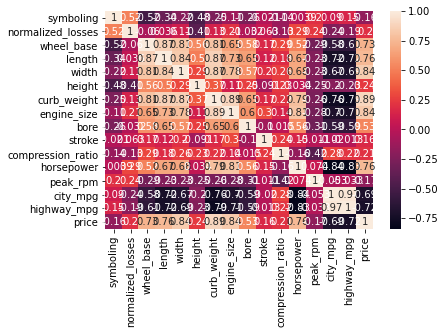

In [11]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [12]:
import seaborn as sns
import patsy
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline


There are two python modules that are commonly used to estimate regression models. 

*  `statsmodels` provides classes and functions for the estimation of statistical models, for conducting statistical tests, and data exploration.
*  `scikit-learn` — is a set of simple tools for data analysis.

## Anscombe's Quartet

Anscombe’s Quartet is a group of four data sets exhibiting almost identical descriptive statistics, but which were formed by very different data processes. As you will see, these data sets are comprised of two variables that have very different distributions from set to set.

The quartet was the invention of statistician Francis Anscombe in 1973, built to illustrate the importance of plotting graphs before building predictive models. 

In [13]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### Groupby 



Notice the data is grouped into four different collections of x and y values. Can you immediately see how those groups differ? 

Pandas has a useful `groupby( )` method that easily allows cross tabulations and other statistical calculations by group ([docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)). This method is particularly useful when applied along three dimensions:

1. **Split** the data up into groups. The groups are defined by *key* variables.
2. **Apply** some method or function to each group: mean, std, max, etc. This returns a smaller bit of data, often just one number.
3. **Combine** the results of the 'apply' from each group into a new data structure.

Let's practice with the quartet. Start by passing `groupby()` a 'key' which tells the method which variable to group by. This is the **split** step from directly above.
  

In [14]:
df_groups = df.groupby('dataset')

We have clearly created an assignment, but what exactly have we assigned? Check the type of the new identifier object.

In [15]:
print(type(df_groups))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


It turns out this is a DataFrameGroupBy object. This is basically a DataFrame + the grouping information. 

Use the code below to take a peek at what you created. You will notice that it appears just as the previous DataFrame - because that is what it is. Note to yourself: `head()` doesn't work for DataFrameGroupedBy.

In [16]:
df_groups.head(15)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### Aggregating 

Our primary use of groupby will be to perform aggregation. This combines the apply and combine steps. For example, let's use the grouped data to compute the means of x and y for each subset.

In [17]:
means = df_groups.mean()  # apply the mean operator to the grouped data

print(type(means))             # what do we get back?

<class 'pandas.core.frame.DataFrame'>


In [18]:
#It is a DataFrame, so we can take a peek using the .head() method 
means.head(10)

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


Using the `.mean()` method on the group data **applied** the mean method to each group, creating one number per group. Those means were then **combined** into a DataFrame.

There data are all actually the same in terms of means, though they look slightly different. We can apply the function `pd.set_option('precision', 2) ` to limit the output to 2 decimal places. 

In [19]:
pd.set_option('precision', 2) 
means.head(10)

,x,y
dataset,,
I,9.0,7.5
II,9.0,7.5
III,9.0,7.5
IV,9.0,7.5


The data appear to all be the same - until we inspect the observations graphically. 

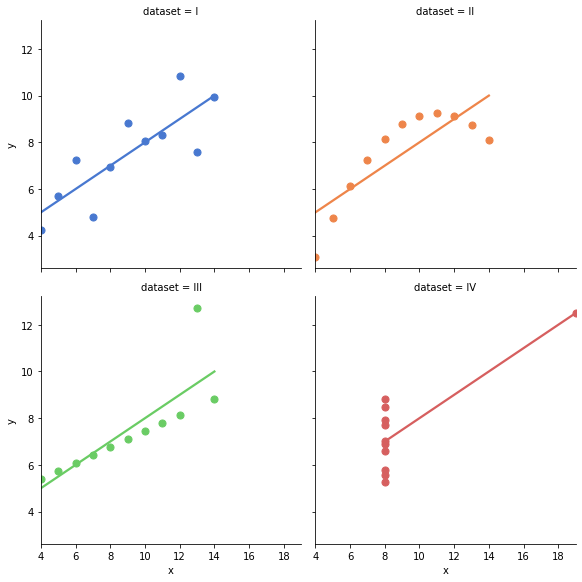

In [20]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

### Using multiple keys

You can also group by several keys. Let's find some better data for the task and compute another statistic. The goali is to produce a MultiIndexed DataFrame with a summary statistic.

In [21]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )

df.to_csv(r'Auto_File.csv', index = False)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [22]:
horsepower_medians = df.groupby(['make','num_cylinders']).median()
horsepower_medians

symboling  normalized_losses  wheel_base  length  \
make          num_cylinders                                                     
alfa-romero   four                 3.0                NaN        88.6  168.80   
              six                  1.0                NaN        94.5  171.20   
audi          five                 1.0              158.0       102.8  185.45   
              four                 2.0              164.0        99.8  176.60   
bmw           four                 1.0              192.0       101.2  176.80   
              six                  0.0              188.0       103.5  189.00   
chevrolet     four                 0.5               89.5        94.5  157.35   
              three                2.0              121.0        88.4  141.10   
dodge         four                 1.0              145.0        93.7  157.30   
honda         four                 0.0              101.0        96.5  163.40   
isuzu         four                 0.5                NaN        94.5  163.30   
jaguar        six                  0.0              145.0       113.0  199.60   
              twelve               0.0                NaN       102.0  191.70   
mazda         four                 1.0              115.0        98.8  175.00   
              two                  3.0              150.0        95.3  169.00   
mercedes-benz eight                0.5              142.0       113.8  200.90   
              five                -1.0               93.0       110.0  190.90   
mercury       four                 1.0                NaN       102.7  178.40   
mitsubishi    four                 2.0              153.0        95.9  172.40   
nissan        four                 1.0              125.0        94.5  165.30   
              six                  0.5              161.0        99.8  180.10   
peugot        four                 0.0              161.0       107.9  186.70   
plymouth      four                 1.0              136.5        93.7  167.30   
porsche       eight                1.0                NaN        98.4  175.70   
              four                 3.0              186.0        94.5  168.90   
              six                  3.0                NaN        89.5  168.90   
renault       four                 1.0                NaN        96.1  179.15   
saab          four                 2.5              127.0        99.1  186.60   
subaru        four                 0.0               89.0        97.0  172.00   
toyota        four                 0.0               91.0        95.7  169.20   
              six                  1.0              197.0       103.7  185.65   
volkswagen    five                 0.0                NaN       100.4  180.20   
              four                 2.0               94.0        97.3  171.70   
volvo         four                -1.0               95.0       104.3  188.80   
              six                 -1.0               95.0       109.1  188.80   

                             width  height  curb_weight  engine_size  bore  \
make          num_cylinders                                                  
alfa-romero   four           64.10   48.80       2548.0        130.0  3.47   
              six            65.50   52.40       2823.0        152.0  2.68   
audi          five           69.65   55.00       2899.0        136.0  3.19   
              four           66.20   54.30       2337.0        109.0  3.19   
bmw           four           64.80   54.30       2395.0        108.0  3.50   
              six            66.90   55.00       3142.5        186.5  3.46   
chevrolet     four           63.60   52.00       1891.5         90.0  3.03   
              three          60.30   53.20       1488.0         61.0  2.91   
dodge         four           63.80   50.60       1989.0         90.0  2.97   
honda         four           64.00   53.30       2024.0         92.0  2.92   
isuzu         four           63.60   52.00       2123.0        100.5  3.17   
jaguar        six

### Grouping over columns

Taking a subset of columns is straightforward. Let's focus on the median horsepower, city_mpg, and highway_mpg.

In [23]:
medians = df.groupby(['make','num_cylinders'])[['horsepower', 'city_mpg', 'highway_mpg']].median()
medians

horsepower  city_mpg  highway_mpg
make          num_cylinders                                   
alfa-romero   four                111.0      21.0         27.0
              six                 154.0      19.0         26.0
audi          five                112.5      18.5         23.5
              four                102.0      24.0         30.0
bmw           four                101.0      23.0         29.0
              six                 151.5      18.0         23.5
chevrolet     four                 70.0      38.0         43.0
              three                48.0      47.0         53.0
dodge         four                 68.0      31.0         38.0
honda         four                 76.0      30.0         34.0
isuzu         four                 74.0      31.0         36.0
jaguar        six                 176.0      15.0         19.0
              twelve              262.0      13.0         17.0
mazda         four                 72.0      30.0         32.0
              two                 101.0      17.0         23.0
mercedes-benz eight               169.5      15.0         17.0
              five                123.0      22.0         25.0
mercury       four                175.0      19.0         24.0
mitsubishi    four                102.0      24.0         30.0
nissan        four                 69.0      31.0         37.0
              six                 156.0      18.0         24.0
peugot        four                 95.0      19.0         24.0
plymouth      four                 68.0      31.0         38.0
porsche       eight               288.0      17.0         28.0
              four                143.0      19.0         27.0
              six                 207.0      17.0         25.0
renault       four                  NaN      23.0         31.0
saab          four                110.0      21.0         28.0
subaru        four                 82.0      26.0         31.0
toyota        four                 70.0      28.0         33.5
              six                 158.5      19.5         24.0
volkswagen    five                110.0      19.0         24.0
              four                 85.0      27.0         34.0
volvo         four                114.0      23.0         28.0
              six                 120.0      22.0         25.0

Now let's say we just want to compare six-cylinder models. It is easy to produce that subset of statistics. 

In [24]:
sixcylinder_medians = medians.xs('six', level='num_cylinders')    # xs() indexes data from a MultiIndex
print(sixcylinder_medians)

             horsepower  city_mpg  highway_mpg
make                                          
alfa-romero       154.0      19.0         26.0
bmw               151.5      18.0         23.5
jaguar            176.0      15.0         19.0
nissan            156.0      18.0         24.0
porsche           207.0      17.0         25.0
toyota            158.5      19.5         24.0
volvo             120.0      22.0         25.0


How do the median horsepower values compare across vehicles with different valve configurations? 

There are a few new plotting tricks here...

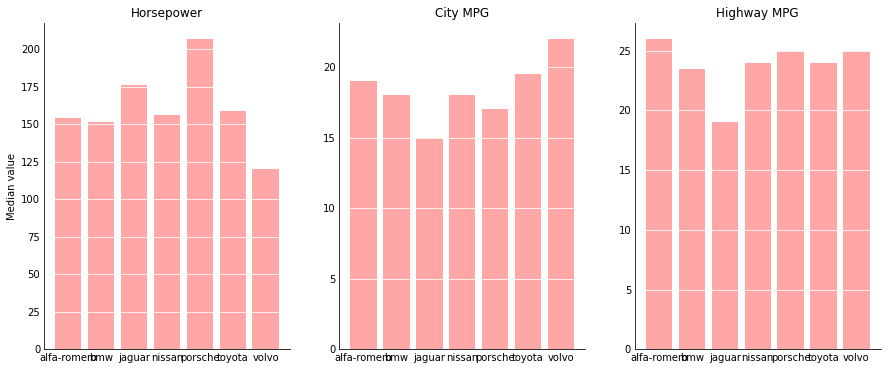

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))

# Set up the color scheme. This makes it easier to fiddle with.
bar_color = 'red'
bar_alpha = 0.35

# Plot one SAT variable on each axes
ax[0].bar(sixcylinder_medians.index, sixcylinder_medians['horsepower'], color=bar_color, alpha=bar_alpha)
ax[1].bar(sixcylinder_medians.index, sixcylinder_medians['city_mpg'], color=bar_color, alpha=bar_alpha)
ax[2].bar(sixcylinder_medians.index, sixcylinder_medians['highway_mpg'],color=bar_color, alpha=bar_alpha)

# Titles!
ax[0].set_title('Horsepower')
ax[1].set_title('City MPG')
ax[2].set_title('Highway MPG')

# I am only setting the ylabel on the left-most. Save some non-data ink.
ax[0].set_ylabel('Median value')

# Set these common parameters by looping over the axes.
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.grid(axis='y', color='white')                # Still experimenting with this...
    a.xaxis.set_tick_params(length=0)              # Kill the xaxis ticks
    a.yaxis.set_tick_params(length=0)              # Kill the yaxis ticks
    
plt.show()


## Practice

1. Create a dataset with only two door vehicles. Name it `two_door`

The `quantile( )` method computes quantiles from the data. (e.g., `quantile(0.5)` computes the median, or the the 50th quantile)

2. Investiage a measure of the curb_weight spread for three different valve configureations (4,6,8). Compute the 50th quantile for 'curb_weight' for each 'num_cylinders'.
    

3. Create a scatter plot with number of cylinders on the x axis and median curb weight on the y axis.

## Now, back to baseball

In [26]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://www4.stat.ncsu.edu/~boos/var.select/baseball.txt'
df = pd.read_csv(url)
df.rename(columns={'x1': 'Batting average', 'x2': 'On-base percentage', 'x3': 'Number of runs', 'x4': 'Number of hits', 'x5': 'Number of doubles', 'x6': 'Number of triples', 'x7': 'Number of home runs', 'x8': 'Number of runs batted in', 'x9': 'Number of walks', 'x10': 'Number of strike-outs', 'x11': 'Number of stolen bases', 'x12': 'Number of errors', 'x13': 'FAeligibility', 'x14': 'Indicator of "free agent in 1991/2"', 'x15': 'Indicator of "arbitration eligibility"', 'x16': 'Indicator of "arbitration in 1991/2"', 'y': 'Salary'}, inplace=True)
print(df)

     Salary  Batting average  On-base percentage  Number of runs  \
0      3300             0.27                0.30              69   
1      2600             0.27                0.34              58   
2      2500             0.25                0.34              54   
3      2475             0.26                0.29              59   
4      2313             0.27                0.35              87   
..      ...              ...                 ...             ...   
332     170             0.11                0.14               3   
333     160             0.26                0.32              24   
334     142             0.19                0.28              38   
335     140             0.26                0.27              24   
336     109             0.26                0.40               6   

     Number of hits  Number of doubles  Number of triples  \
0               153                 21                  4   
1               111                 17                  2   


In [27]:
x = df['Batting average']
y = df['Salary']

In [28]:
x = sm.add_constant(x)
x

,const,Batting average
0,1.0,0.27
1,1.0,0.27
2,1.0,0.25
3,1.0,0.26
4,1.0,0.27
...,...,...
332,1.0,0.11
333,1.0,0.26
334,1.0,0.19
335,1.0,0.26


In [29]:
#x = sm.add_constant(x)
model = sm.OLS(y, x)


In [30]:
model

In [31]:
results = model.fit()

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     27.70
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           2.53e-07
Time:                        16:42:29   Log-Likelihood:                -2864.7
No. Observations:                 337   AIC:                             5733.
Df Residuals:                     335   BIC:                             5741.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -985.7064    429.442     

In [33]:
x1 = x.drop(['const'], axis=1)

In [34]:
x1

,Batting average
0,0.27
1,0.27
2,0.25
3,0.26
4,0.27
...,...
332,0.11
333,0.26
334,0.19
335,0.26


In [35]:
x1 = np.array(x['Batting average'])

In [36]:
m, b = np.polyfit(x1, y, 1)

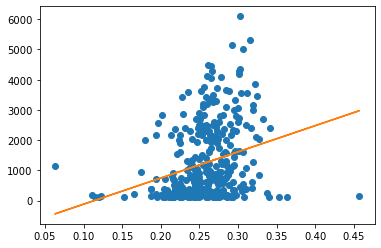

In [37]:
plt.plot(x1, y, 'o')
plt.plot(x1, m*x1 + b)

In [38]:
X = df[['Batting average', 'On-base percentage', 'Number of runs', 'Number of hits']]

In [39]:
X

,Batting average,On-base percentage,Number of runs,Number of hits
0,0.27,0.30,69,153
1,0.27,0.34,58,111
2,0.25,0.34,54,115
3,0.26,0.29,59,128
4,0.27,0.35,87,169
...,...,...,...,...
332,0.11,0.14,3,3
333,0.26,0.32,24,48
334,0.19,0.28,38,50
335,0.26,0.27,24,74


In [40]:
from sklearn import linear_model

In [41]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [42]:
print(regr.coef_)

[-2941.2388075   1989.11738627    17.18630715     6.28503276]


In [43]:
predictedsalary = regr.predict([[.4, .5, 150, 350]])

print(predictedsalary)

[4572.18436979]


## Describing models with patsy
The patsy package provides us with a formulaic syntax for defining models that uses strings. The basic syntax is

y ~ x1 + x2
 

In [49]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = patsy.dmatrices('Salary ~ Q("Batting average")+Q("On-base percentage")+Q("Number of runs")+Q("Number of hits")', df)

In [50]:
print('X and y are of type:' , type(X), type(y))

X and y are of type: <class 'patsy.design_info.DesignMatrix'> <class 'patsy.design_info.DesignMatrix'>


In [51]:
X

DesignMatrix with shape (337, 5)
  Columns:
    ['Intercept',
     'Q("Batting average")',
     'Q("On-base percentage")',
     'Q("Number of runs")',
     'Q("Number of hits")']
  Terms:
    'Intercept' (column 0)
    'Q("Batting average")' (column 1)
    'Q("On-base percentage")' (column 2)
    'Q("Number of runs")' (column 3)
    'Q("Number of hits")' (column 4)
  (to view full data, use np.asarray(this_obj))

In [52]:
y

DesignMatrix with shape (337, 1)
  Salary
    3300
    2600
    2500
    2475
    2313
    2175
     600
     460
     240
     200
     177
     140
     117
     115
    2600
    1907
    1190
     990
     925
     365
     302
     300
     129
     111
    6100
    4125
    3213
    2319
    2000
    1600
  [307 rows omitted]
  Terms:
    'Salary' (column 0)
  (to view full data, use np.asarray(this_obj))

In [53]:
# Pass design matrices to OLS to spec an ordinary least squares model
salary_model = sm.OLS(y, X)
type(salary_model)

statsmodels.regression.linear_model.OLS

In [54]:
res = salary_model.fit()  # Estimate the model and store the results in res
type(res)          # What do we have here?

statsmodels.regression.linear_model.RegressionResultsWrapper

In [55]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     60.29
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           3.05e-38
Time:                        17:02:12   Log-Likelihood:                -2786.1
No. Observations:                 337   AIC:                             5582.
Df Residuals:                     332   BIC:                             5601.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [56]:
print('The parameters are:', res.params, '\n')
print('The confidence intervals are:', res.conf_int(), '\n')
print('The r-sqared is:', res.rsquared)

The parameters are: [  -23.58633958 -2941.2388075   1989.11738627    17.18630715
     6.28503276] 

The confidence intervals are: [[-7.88959479e+02  7.41786800e+02]
 [-8.04812569e+03  2.16564808e+03]
 [-2.29884103e+03  6.27707580e+03]
 [ 6.45722881e+00  2.79153855e+01]
 [ 2.89433149e-01  1.22806324e+01]] 

The r-sqared is: 0.42076811787283563


In [57]:
y, X = patsy.dmatrices('Salary ~ Q("Batting average")+Q("On-base percentage")+Q("Number of runs")+Q("Number of hits")+Q("Number of runs batted in")', data=df, return_type='dataframe')

In [58]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [59]:
vif

,VIF,variable
0,56.82,Intercept
1,4.01,"Q(""Batting average"")"
2,3.97,"Q(""On-base percentage"")"
3,9.55,"Q(""Number of runs"")"
4,11.10,"Q(""Number of hits"")"
5,3.94,"Q(""Number of runs batted in"")"


In [ ]:
results = smf.ols('Salary ~ Q("Batting average")+Q("On-base percentage")+Q("Number of runs")', data=df).fit()
print(results.summary())

In [ ]:
results = smf.ols('Salary ~ Q("Batting average")*Q("On-base percentage")', data=df).fit()
print(results.summary())

In [ ]:
results = smf.ols('Salary ~ Q("Batting average")+Q("On-base percentage")+Q("Number of runs")+C(FAeligibility) -1', data=df).fit()
print(results.summary())

In [ ]:
df['fa'] = df['FAeligibility'].replace({1.0:'free', 0.0:'notfree'})
results = smf.ols('Salary ~ Q("Batting average")+Q("On-base percentage")+Q("Number of runs")+C(fa)', data=df).fit()

print(res.summary())

In [ ]:
df['fa'] = df['FAeligibility'].replace({1.0:'free', 0.0:'notfree'})
results = smf.ols('Salary ~ Q("Batting average")+Q("On-base percentage")+Q("Number of runs")', data=df).fit()

print(res.summary())

In [ ]:
results = smf.ols('Salary ~ Q("Batting average")+Q("On-base percentage")+Q("Number of runs")+C(fa)', data=df).fit()

print(res.summary())